# Similarity Measures

## Transforming data to be able to use euclidean distance

- This can be obtained through the normalization of each data vector in the dataset

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [1]:
# 10 vectors (books for example)
computer = [1, 2, 0, 0, 0, 3, 7, 1, 4, 0]
calculus = [0, 2, 1, 6, 0, 1, 3, 5, 4, 1]

In [6]:
df = pd.DataFrame({"computer": computer, "calculus": calculus})

<Axes: xlabel='computer', ylabel='calculus'>

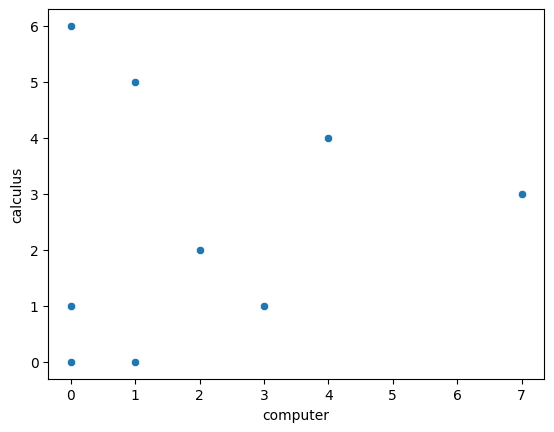

In [8]:
sns.scatterplot(df, x='computer', y='calculus')

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
vectors =np.array([computer, calculus]).reshape((2,10)).transpose()

array([[1, 0],
       [2, 2],
       [0, 1],
       [0, 6],
       [0, 0],
       [3, 1],
       [7, 3],
       [1, 5],
       [4, 4],
       [0, 1]])

In [23]:
distances = cosine_distances(vectors)

In [27]:
vectors

array([[1, 2],
       [0, 0],
       [0, 3],
       [7, 1],
       [4, 0],
       [0, 2],
       [1, 6],
       [0, 1],
       [3, 5],
       [4, 1]])

In [26]:
distances

array([[0.        , 1.        , 0.10557281, 0.43079002, 0.5527864 ,
        0.10557281, 0.04422099, 0.10557281, 0.00294551, 0.34920863],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.10557281, 1.        , 0.        , 0.85857864, 1.        ,
        0.        , 0.01360608, 0.        , 0.14250707, 0.75746437],
       [0.43079002, 1.        , 0.85857864, 0.        , 0.01005051,
        0.85857864, 0.69775614, 0.85857864, 0.36940737, 0.00530821],
       [0.5527864 , 1.        , 1.        , 0.01005051, 0.        ,
        1.        , 0.83560101, 1.        , 0.48550424, 0.0298575 ],
       [0.10557281, 1.        , 0.        , 0.85857864, 1.        ,
        0.        , 0.01360608, 0.        , 0.14250707, 0.75746437],
       [0.04422099, 1.        , 0.01360608, 0.69775614, 0.83560101,
        0.01360608, 0.        , 0.01360608, 0.06959161, 0.60127389],
       [0.10557281, 1.        , 0.       